In [1]:
# Import necessary libraries
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
# Load the MNIST dataset locally
mnist_path = "./mnist.npz"
with np.load(mnist_path) as f:
    train_images, train_labels = f['x_train'], f['y_train']
    test_images, test_labels = f['x_test'], f['y_test']



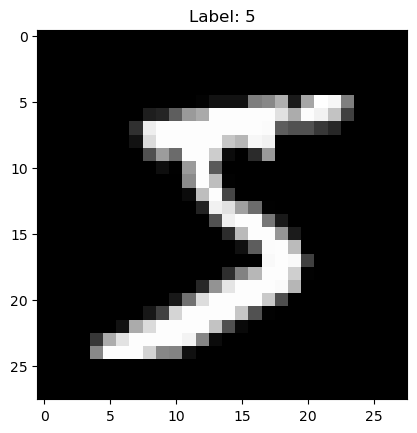

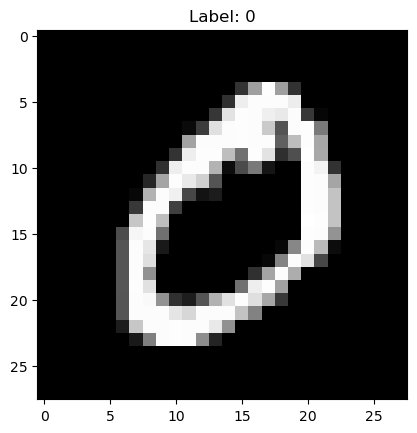

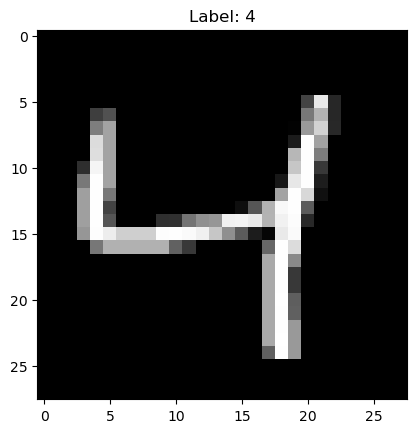

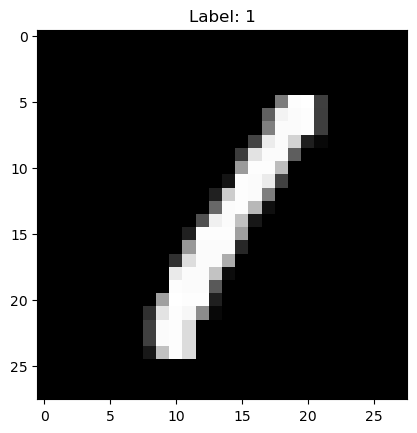

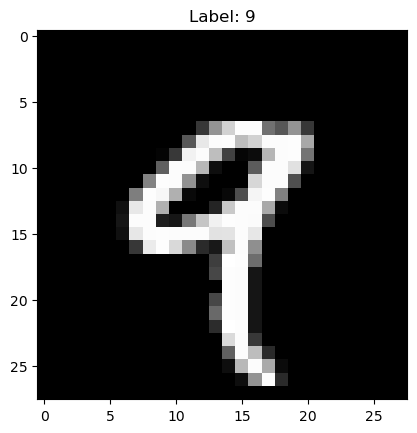

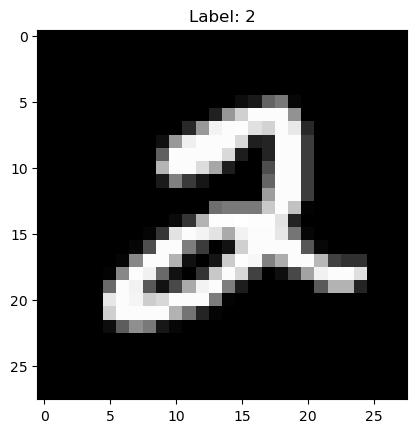

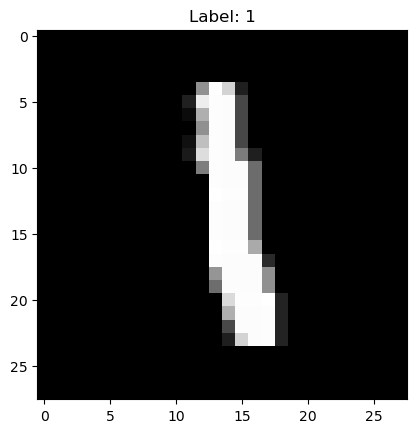

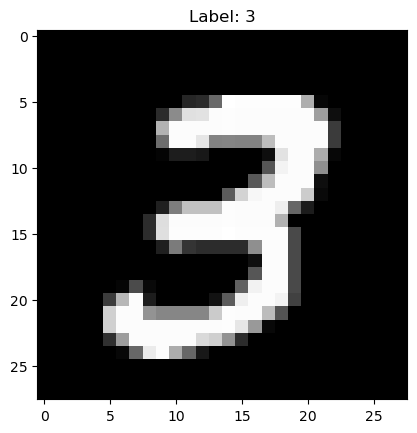

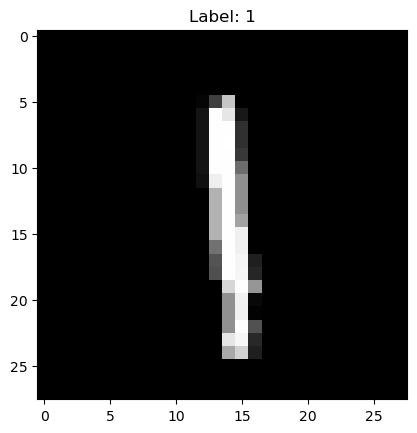

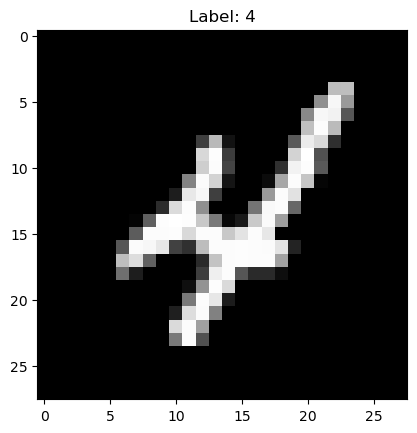

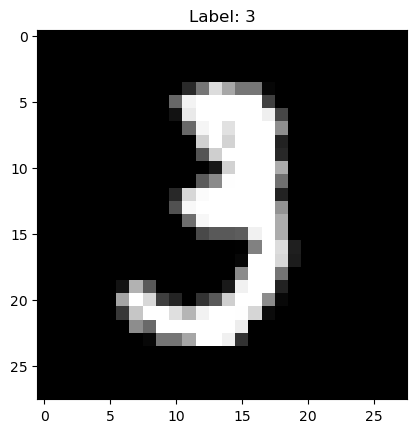

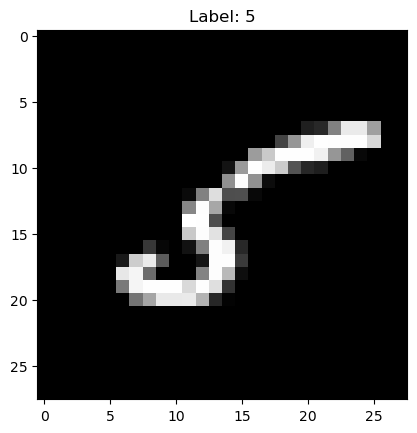

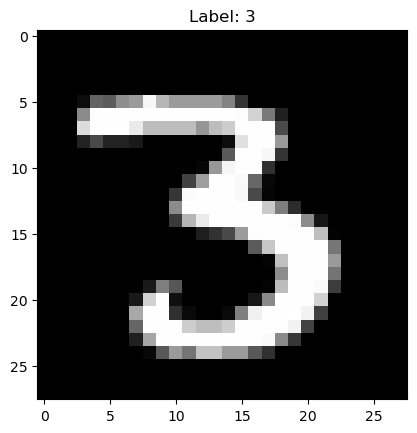

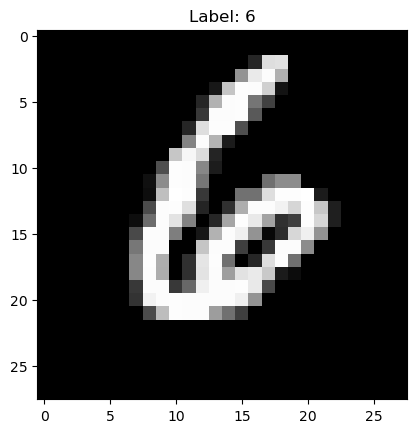

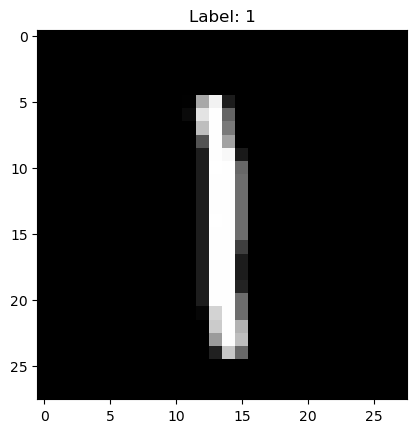

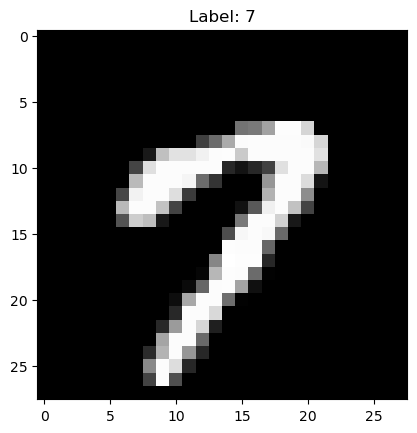

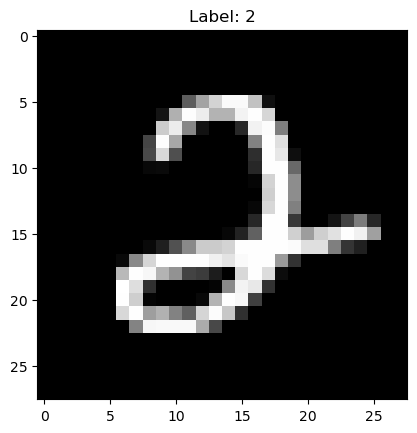

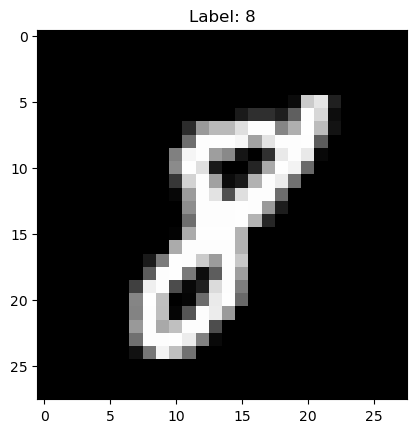

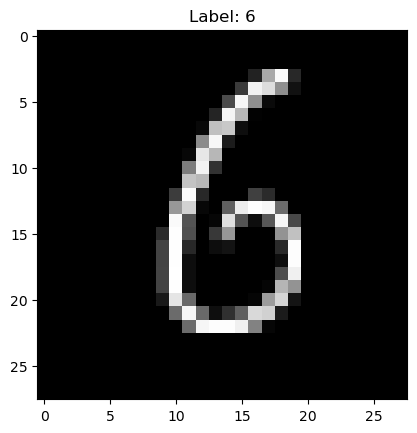

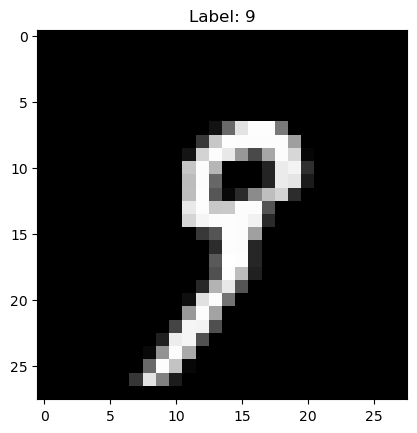

In [3]:
# Display the first few images and their labels for exploration
for i in range(20):
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.show()


In [4]:
# Preprocess the data: Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [5]:
# Flatten the images (convert 2D arrays to 1D arrays)
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

In [6]:
# Build the neural network model
model = keras.Sequential([
    layers.InputLayer(input_shape=(28 * 28)),  # Input layer with 28*28 neurons
    layers.Dense(128, activation='relu'),      # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax')      # Output layer with 10 neurons (one for each digit) and softmax activation
])


In [7]:
# Compile the model with optimizer, loss function, and evaluation metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model on the training data
model.fit(train_images, train_labels, epochs=5, validation_split=0.2)
clear_output(wait=True)  # Clear the output for a cleaner display


Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2855 - accuracy: 0.9175 - val_loss: 0.1495 - val_accuracy: 0.9582
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1248 - accuracy: 0.9633 - val_loss: 0.1138 - val_accuracy: 0.9666
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0856 - accuracy: 0.9745 - val_loss: 0.1073 - val_accuracy: 0.9666
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0640 - accuracy: 0.9800 - val_loss: 0.0944 - val_accuracy: 0.9712
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0900 - val_accuracy: 0.9730


In [9]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9762
Test Accuracy: 0.9761999845504761


In [10]:
# Make predictions on test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


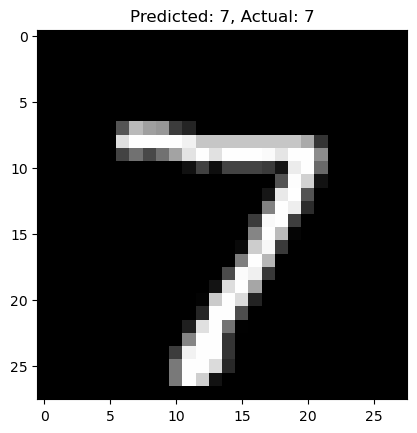

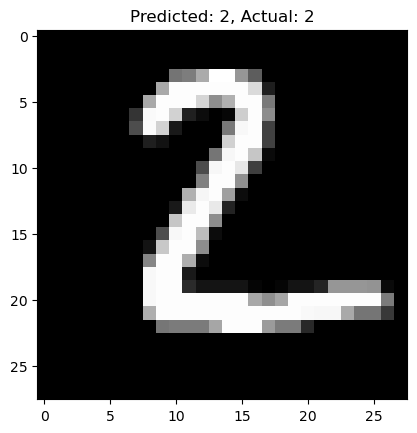

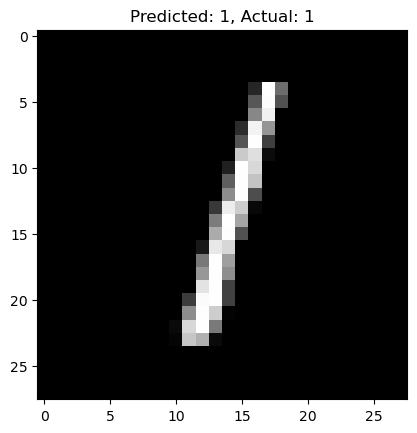

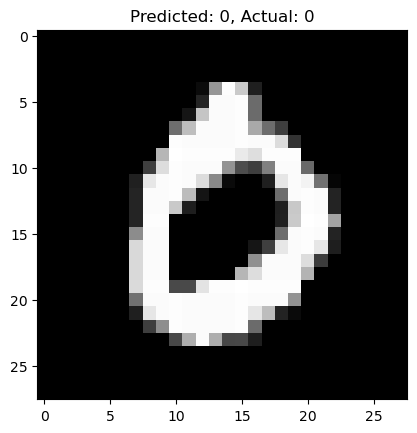

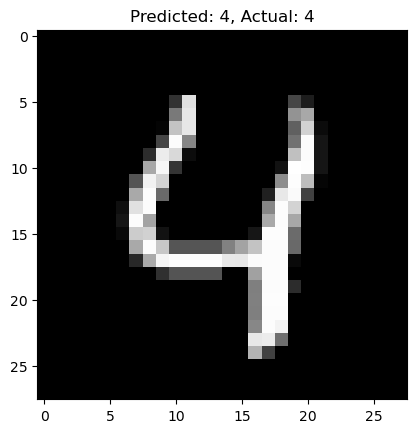

In [11]:
# Display a few predictions with their corresponding actual labels
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {test_labels[i]}")
    plt.show()
